# Excerpts from the NLTK book for quick referencing commonly needed NLP code
#### (https://www.nltk.org/book/)

In [1]:
import nltk
% matplotlib inline

## Chapter 1

In [2]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


### Searching text

Concordance:
Displaying 2 of 2 matches:
iding up and down there , defied the worst the pistols could do ; but gave the 
mental manufacturing stages , is the worst . I should like to conclude the chap

Similar:
world while whale more lord sea other ship wind same fishery air
matter night time crew deck last door pulpit

Co-context:
the_the the_i

Dispersion plots:


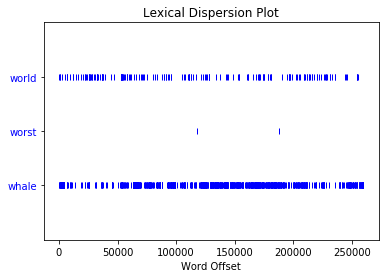

In [3]:
# 1. All occurences of query:
print('Concordance:')
text1.concordance("worst")
print()
# 2. Similar words used in same context:
print('Similar:')
text1.similar("worst")
print()
# 3. Contexts shared by words
print('Co-context:')
text1.common_contexts(['worst', 'whale'])
print()
# 4. Dispersion of words: which place do they occur at in the given text
print('Dispersion plots:')
text1.dispersion_plot(["world", "worst", "whale"])
print()

### Vocabulary

In [4]:
# 1. Token count - all words in corpus:
print('Tokens: ', len(text1))
# 2. Types count - unique words in corpus:
print('Types: ', len(set(text1)))
# 3. Lexical richness of text:
print('Lexical richness: ', len(set(text1))/len(text1))
# 4. Percentage taken by word:
print('Word use percentage: ', text1.count('whale')/len(text1))

Tokens:  260819
Types:  19317
Lexical richness:  0.07406285585022564
Word use percentage:  0.003473673313677301


### Statistics on text

10 most frequent words:  [(',', 18713), ('the', 13721), ('.', 6862), ('of', 6536), ('and', 6024)]

Cumulative frequency plot: 


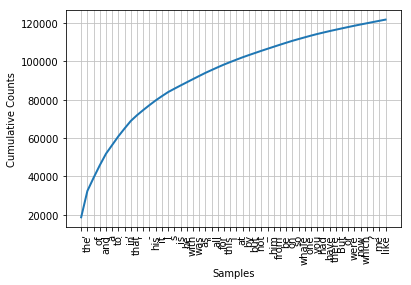

Rarest words:  ['Herman', 'Melville', ']', 'ETYMOLOGY', 'Late', 'Consumptive', 'School']


In [5]:
# 1. Frequency distribution and 5 most common words:
fdist1 = FreqDist(text1)
print('10 most frequent words: ', fdist1.most_common(5))
print()
# 2. Frequent words plot:
print('Cumulative frequency plot: ')
fdist1.plot(50, cumulative=True)
# 3. Rarest words (hapaxes):
print('Rarest words: ', fdist1.hapaxes()[:7])
# Table 3.1 in Chapter 1 for more

### Finding "important" words

In [6]:
# 1. Choosing 'long' words:
long_words = [w for w in set(text1) if len(w) > 15]
print('Long words: ', long_words[:5])
print()
# 2. Long words + more occuring words
long_commoner_words = [w for w in set(text1) if len(w) > 5 and fdist1[w]>5]
print('Long commoner words: ', long_commoner_words[:5])

Long words:  ['circumnavigation', 'preternaturalness', 'CIRCUMNAVIGATION', 'simultaneousness', 'indiscriminately']

Long commoner words:  ['pockets', 'swelled', 'returning', 'rolled', 'questions']


### Collocations (sequences of words occuring more often) and bigrams

In [7]:
# 1. Get bigrams from data:
bgrams_text1 = list(bigrams(text1))
print('Bigrams: ', bgrams_text1[:5])
print()
# 2. Collocations - gettings common bigrams - rare words + freq bigram
print('Collocations: ')
text1.collocations()

Bigrams:  [('[', 'Moby'), ('Moby', 'Dick'), ('Dick', 'by'), ('by', 'Herman'), ('Herman', 'Melville')]

Collocations: 
Sperm Whale; Moby Dick; White Whale; old man; Captain Ahab; sperm
whale; Right Whale; Captain Peleg; New Bedford; Cape Horn; cried Ahab;
years ago; lower jaw; never mind; Father Mapple; cried Stubb; chief
mate; white whale; ivory leg; one hand


#### ***Common string methods in Python given in section 4, Ch1 

## Chapter 2

### Accessing data

In [8]:
# Project Gutenberg
nltk.corpus.gutenberg.fileids()
emma = nltk.corpus.gutenberg.words('austen-emma.txt')

# Web and chat text
from nltk.corpus import webtext
webtext.fileids()

# Brown corpus
from nltk.corpus import brown
news_text = brown.words(categories='news')

# Reuters
from nltk.corpus import reuters
reuters.fileids()

# Inaugural address
from nltk.corpus import inaugural
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

### Frequency distribution of words

In [9]:
fdist = nltk.FreqDist(w.lower() for w in news_text)
modals = ['can', 'could', 'may', 'might', 'must', 'will']
for m in modals:
    print(m + ':', fdist[m], end=' ')

can: 94 could: 87 may: 93 might: 38 must: 53 will: 389 

### Conditional Freq Dist

In [10]:
# Table
cfd = nltk.ConditionalFreqDist((genre, word) for genre in brown.categories() for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


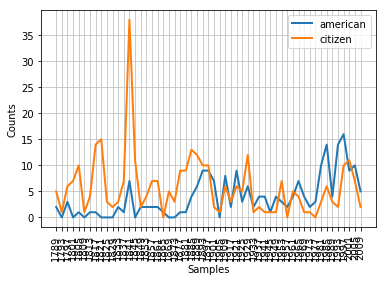

In [11]:
# Graph
cfd = nltk.ConditionalFreqDist((target, fileid[:4]) for fileid in inaugural.fileids() \
                               for w in inaugural.words(fileid) for target in ['american', 'citizen'] \
                               if w.lower().startswith(target))
cfd.plot()

### Generating Random Text with Bigrams

In [12]:
sent = ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth', '.']
list(nltk.bigrams(sent))

[('In', 'the'),
 ('the', 'beginning'),
 ('beginning', 'God'),
 ('God', 'created'),
 ('created', 'the'),
 ('the', 'heaven'),
 ('heaven', 'and'),
 ('and', 'the'),
 ('the', 'earth'),
 ('earth', '.')]

In [13]:
# this is done to prevent against infinite looping
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        word = cfdist[word].max()

text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

In [14]:
cfd['living']

FreqDist({'creature': 7, 'thing': 4, 'substance': 2, 'soul': 1, '.': 1, ',': 1})

In [15]:
print(generate_model(cfd, 'living'))

living creature that he said , and the land of the land of the land None


### Generating text using random choices

In [16]:
emma_text = nltk.corpus.gutenberg.words('austen-emma.txt')
emma_bigrams = nltk.bigrams(emma_text)
emma_cfd = nltk.ConditionalFreqDist(emma_bigrams)
generate_model(emma_cfd, 'The', 100)

The very much to be a very much to be a very much to be a very much to be a very much to be a very much to be a very much to be a very much to be a very much to be a very much to be a very much to be a very much to be a very much to be a very much to be a very much to be a very much to be a very much to be a very much to be a very much to be a very much to be 

In [17]:
import random
# another way to prevent against infinite looping
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        words = list(cfdist[word])
        word = random.choice(words)

In [18]:
cfd = nltk.ConditionalFreqDist(emma_bigrams)
print(generate_model(emma_cfd, 'The', 100))

The fever at somebody had desired Perry has persuaded ; his features , involuntarily : _she_ should foresee in most charming evening is meeting her voice well : the pitifullest old story against the encouragement !-- Miss F ., he either a settled , would _not_ wish to take any _assistance_ that well to affection so glad he continue there was tempted away and smiled himself without being saved only weak to despise the fruit in detecting the possibility ;-- your congratulations , _Bath_ , insensible , shows of women must proceed with temper was perceived her severe than my None


### Comparing texts

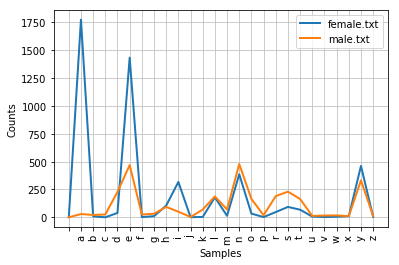

In [19]:
names = nltk.corpus.names
names.fileids()
male_names = names.words('male.txt')
female_names = names.words('female.txt')
# Comparing names ending with certain letter
cfd = nltk.ConditionalFreqDist((fileid, name[-1]) for fileid in names.fileids() for name in names.words(fileid))
cfd.plot()

## Chapter 3

### Word Tokenzation

In [20]:
# 1. Word tokenizing - getting a list of all words:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
... is no basis for a system of government.  Supreme executive power derives from
... a mandate from the masses, not from some farcical aquatic ceremony."""
tokens = nltk.word_tokenize(raw)
print('Tokens: ', tokens)
print()
# 2. Stemming
ps = nltk.PorterStemmer()
print('Porter stemmed: ', [ps.stem(token) for token in tokens])
print()
# 3. Lemmatization
wnl = nltk.WordNetLemmatizer()
print('Lemmas: ', [wnl.lemmatize(token) for token in tokens])

Tokens:  ['DENNIS', ':', 'Listen', ',', 'strange', 'women', 'lying', 'in', 'ponds', 'distributing', 'swords', '...', 'is', 'no', 'basis', 'for', 'a', 'system', 'of', 'government', '.', 'Supreme', 'executive', 'power', 'derives', 'from', '...', 'a', 'mandate', 'from', 'the', 'masses', ',', 'not', 'from', 'some', 'farcical', 'aquatic', 'ceremony', '.']

Porter stemmed:  ['denni', ':', 'listen', ',', 'strang', 'women', 'lie', 'in', 'pond', 'distribut', 'sword', '...', 'is', 'no', 'basi', 'for', 'a', 'system', 'of', 'govern', '.', 'suprem', 'execut', 'power', 'deriv', 'from', '...', 'a', 'mandat', 'from', 'the', 'mass', ',', 'not', 'from', 'some', 'farcic', 'aquat', 'ceremoni', '.']

Lemmas:  ['DENNIS', ':', 'Listen', ',', 'strange', 'woman', 'lying', 'in', 'pond', 'distributing', 'sword', '...', 'is', 'no', 'basis', 'for', 'a', 'system', 'of', 'government', '.', 'Supreme', 'executive', 'power', 'derives', 'from', '...', 'a', 'mandate', 'from', 'the', 'mass', ',', 'not', 'from', 'some', 'f